Let $X = \rho(UA)$ for Haar-random $U$ and let $Y = \|Av\|$ for surface area random $v \in S^{n-1}$. 

Let $Y' = \|Av\|$ where $v$ is a top eigenvector of Haar random $UA$.

If $X \succcurlyeq Y' \succcurlyeq Y$, then $X \succcurlyeq Y$ where $A\succcurlyeq B$ means $A$ (first or second order) stochastically dominates $B$. Second order domination is enough to conclude that the inequalities of averages is true. 

By construction, $X \succcurlyeq Y'$, (this is the "integrate by montecarlo" coupling).

So it remains to be seen whether $Y' \succcurlyeq Y$ in the first order or maybe only in second order.

To see experimentally if this is true, generate 10000 UA, put all $10000$ **top** eigenvectors in set $H$, then check if the CDF of $Y' = \text{set of } \|Av\| \forall v \in H$ dominates $Y = \text{set of } \|Av\| \forall v \in S^{n-1}$


In [1]:
import numpy as np
from scipy.stats import special_ortho_group, ortho_group, unitary_group
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [5,5]
%matplotlib notebook


In [2]:
def random_S_n(n):
    x = np.random.normal(0,1,(1,n))[0]
    return x / np.linalg.norm(x)

def random_complex_S_n(n):
    z = random_S_n(2*n)
    z_prime = []
    for i in np.arange(0,2*n,2):
        z_prime.append(z[i]+z[i+1]*1j)
    return z_prime

def CDF(data, len_data = 10000):
    N = len(data)
    count, bins_count = np.histogram(data, bins=len_data)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    return [bins_count[1:],cdf]

def stereo_proj(X,Y):
    # X and Y are the Real and Imaginary coordinates respectively of z in C cup infty
    denominator = 1 + X**2 + Y**2
    vector = np.array([2*X, 2*Y, -1 + X**2 + Y**2])
    return vector/denominator
def A1(x,y,z):
    if z > 1/2 and z <= 1:
        return True
    return False

def A2(x,y,z):
    if z > 0 and z <= 1/2:
        return True
    return False

def A3(x,y,z):
    if z > -1/2 and z <= 0:
        return True
    return False

def A4(x,y,z):
    if z >= -1 and z < -1/2:
        return True
    return False

def B1(x,y,z):
    if x >= 0 and y > 0:
        return True
    return False
def B2(x,y,z):
    if x < 0 and y > 0:
        return True
    return False
def B3(x,y,z):
    if x < 0 and y <= 0:
        return True
    return False
def B4(x,y,z):
    if x >= 0 and y <= 0:
        return True
    return False

def coding(x,y,z):
    if A1(x,y,z) and B1(x,y,z):
        return 1
    if A1(x,y,z) and B2(x,y,z):
        return 2
    if A1(x,y,z) and B3(x,y,z):
        return 3
    if A1(x,y,z) and B4(x,y,z):
        return 4
    if A2(x,y,z) and B1(x,y,z):
        return 5
    if A2(x,y,z) and B2(x,y,z):
        return 6
    if A2(x,y,z) and B3(x,y,z):
        return 7
    if A2(x,y,z) and B4(x,y,z):
        return 8
    if A3(x,y,z) and B1(x,y,z):
        return 9
    if A3(x,y,z) and B2(x,y,z):
        return 10
    if A3(x,y,z) and B3(x,y,z):
        return 11
    if A3(x,y,z) and B4(x,y,z):
        return 12
    if A4(x,y,z) and B1(x,y,z):
        return 13
    if A4(x,y,z) and B2(x,y,z):
        return 14
    if A4(x,y,z) and B3(x,y,z):
        return 15
    if A4(x,y,z) and B4(x,y,z):
        return 16

# Over Unitary Group

In [149]:
A = np.diag([7,1/2])
n = len(A)
H = []

constant = np.sqrt(np.prod(np.diag(A)))
for i in range(10000):
    U = unitary_group.rvs(n)
    l , V = np.linalg.eig(U@A)
    if np.max(np.abs(l)) >= constant:
        max_idx = np.argmax(np.abs(l))
        H.append(V[:,max_idx])

In [150]:
constant

1.8708286933869707

In [151]:
dist_Y_prime = [[np.linalg.norm(A@h),stereo_proj((h[1]/h[0]).real, (h[1]/h[0]).imag)] for h in H]
dist_Y = []
dist_Y_all = []
for h in H:
    boolean = True
    while boolean:
        v = random_complex_S_n(n)
        if np.linalg.norm(A@v) >= constant:
            boolean = False 
            dist_Y.append([np.linalg.norm(A@v),stereo_proj((v[1]/v[0]).real, (v[1]/v[0]).imag)])
            w = random_complex_S_n(n)
            dist_Y_all.append([np.linalg.norm(A@w),stereo_proj((w[1]/w[0]).real, (w[1]/w[0]).imag)])

In [152]:
dist_Y = sorted(dist_Y)
dist_Y_prime = sorted(dist_Y_prime)

In [153]:
print(np.mean([Av[0] for Av in dist_Y_prime]))
print(np.mean([Av[0] for Av in dist_Y]))

4.814755992527295
4.939598709708147


for complex $v$ in $S^{2n-1}$

<IPython.core.display.Javascript object>


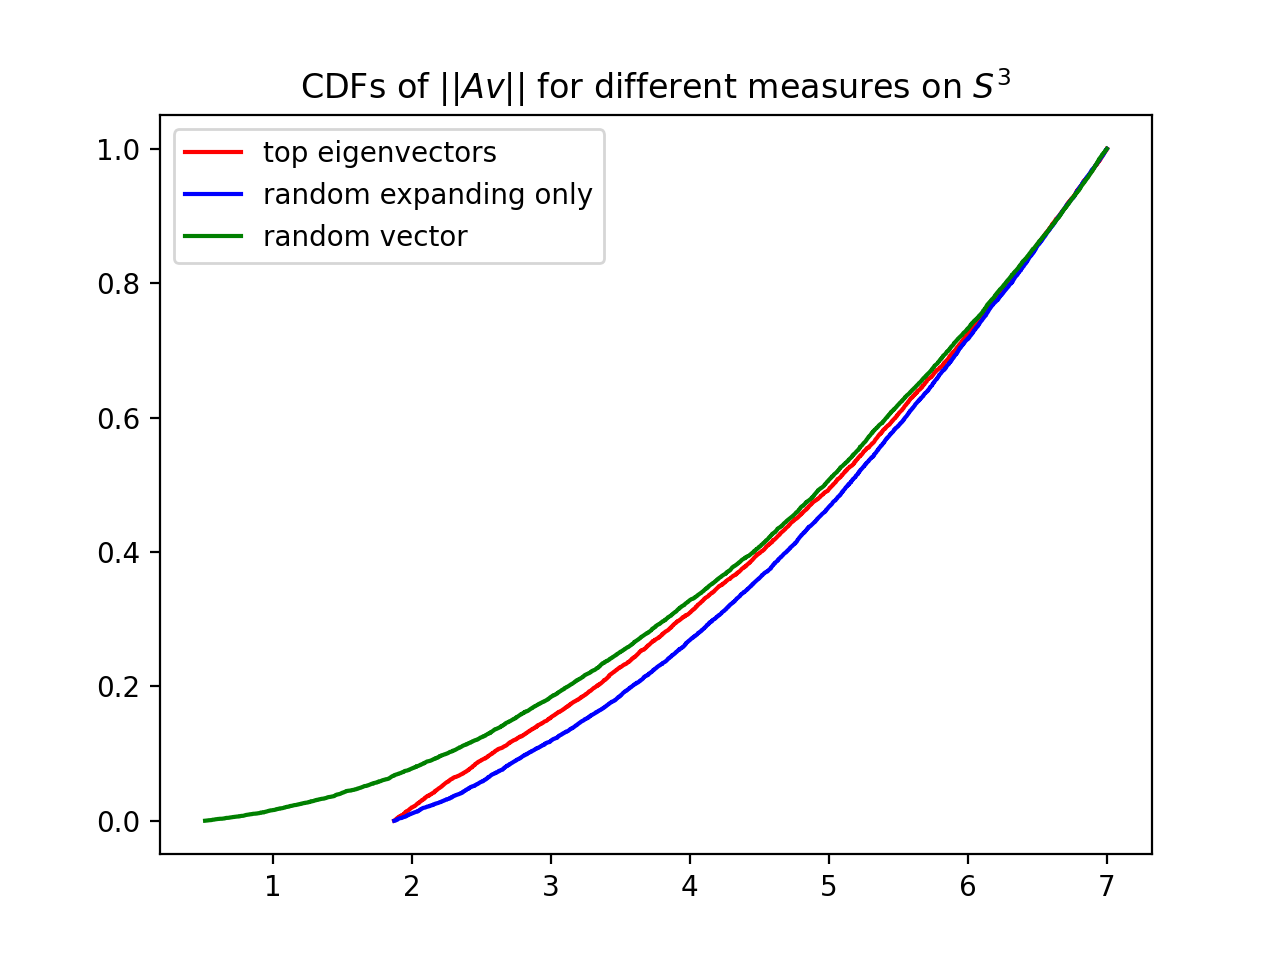

Text(0.5, 1.0, 'CDFs of $||Av||$ for different measures on $S^3$')

In [154]:
t1, CDF1 = CDF([Av[0] for Av in dist_Y_prime])
t2, CDF2 = CDF([Av[0] for Av in dist_Y])
t3, CDF3 = CDF([Av[0] for Av in dist_Y_all])


plt.plot(t1, CDF1, label = "top eigenvectors", color = "red")
plt.plot(t2, CDF2, label = "random expanding only", color = "blue")
plt.plot(t3, CDF3, label = "random vector", color = "green")

plt.legend()
plt.title("CDFs of $||Av||$ for different measures on $S^3$")

In [143]:
def lower_Riemann(values,CDF):
    H = []
    for i in range(1,len(values)):
        width = values[i]-values[i-1]
        x = CDF[i-1]*width
        H.append(x)
    return np.array(H)


def rolling_lower_Riemann(H):
    G = [0]
    for i in range(len(H)):
        G.append(np.sum(H[:i]))
    return G

In [144]:
sum(lower_Riemann(t1, CDF1))

0.49176618066935296

<IPython.core.display.Javascript object>


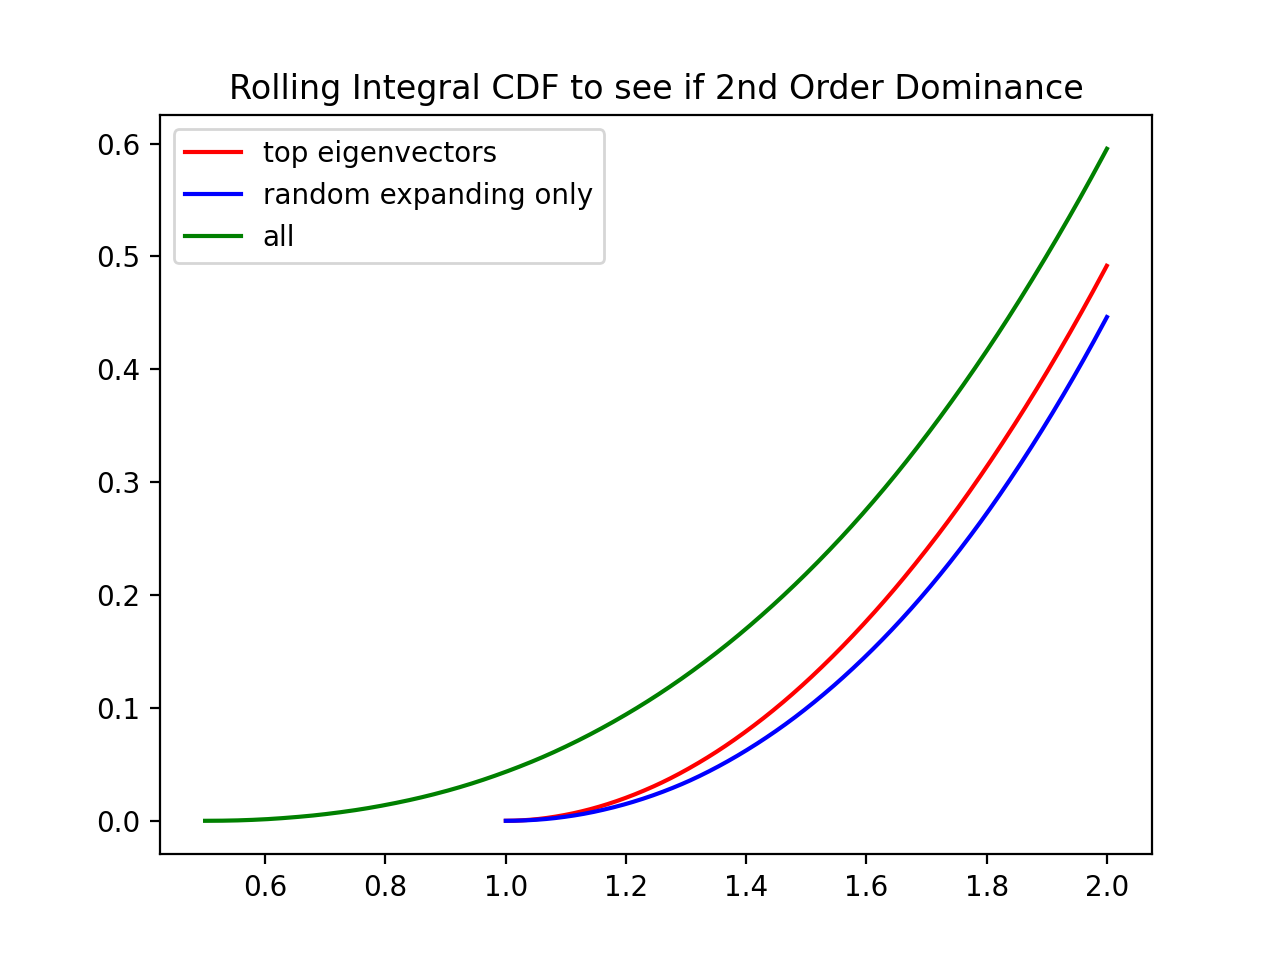

Text(0.5, 1.0, 'Rolling Integral CDF to see if 2nd Order Dominance')

In [148]:
plt.plot(t1, rolling_lower_Riemann(lower_Riemann(t1, CDF1)), label = "top eigenvectors", color = "red")
plt.plot(t2, rolling_lower_Riemann(lower_Riemann(t2, CDF2)), label = "random expanding only", color = "blue")
plt.plot(t3, rolling_lower_Riemann(lower_Riemann(t3, CDF3)), label = "all", color = "green")
plt.legend()
plt.title("Rolling Integral CDF to see if 2nd Order Dominance")

In [ ]:
len(t1)

<IPython.core.display.Javascript object>


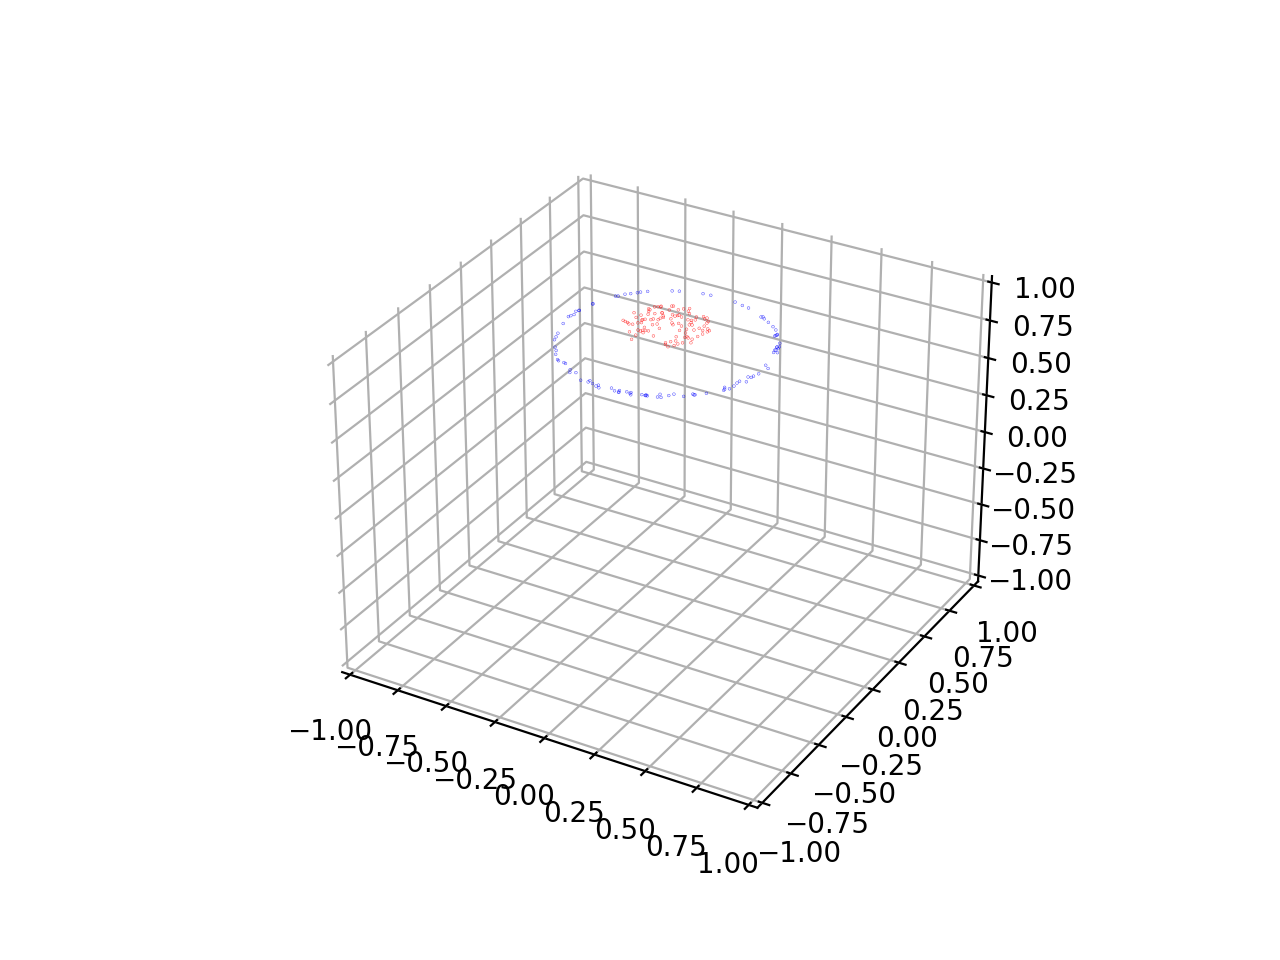

In [42]:
fig = plt.figure(1)    
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((0,0,0))
ax.w_yaxis.set_pane_color((0,0,0))
ax.w_zaxis.set_pane_color((0,0,0))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

def plot_frame(k):
    global dist_Y, dist_Y_prime, fig, ax
    v_Y_prime = np.array([dist_Y_prime[i][1] for i in range(k)])
    v_Y = np.array([dist_Y[i][1] for i in range(k)])

    ax.scatter3D(v_Y_prime[:,0], v_Y_prime[:,1], v_Y_prime[:,2],
                 alpha = 0.85, 
                 color = "blue", 
                 label = "expanding eigenvector",
                 s = 0.02)

    ax.scatter3D(v_Y[:,0], v_Y[:,1], v_Y[:,2],
                 alpha = 0.85,
                 color = "red",
                 label = "random $v \in S^{2}$",
                 s = 0.02)
plot_frame(100)

In [45]:
dist_Y_prime[0]

[1.000245162334763, array([ 0.26357058, -0.38999029,  0.8822914 ])]

In [ ]:
4 1/4

<IPython.core.display.Javascript object>


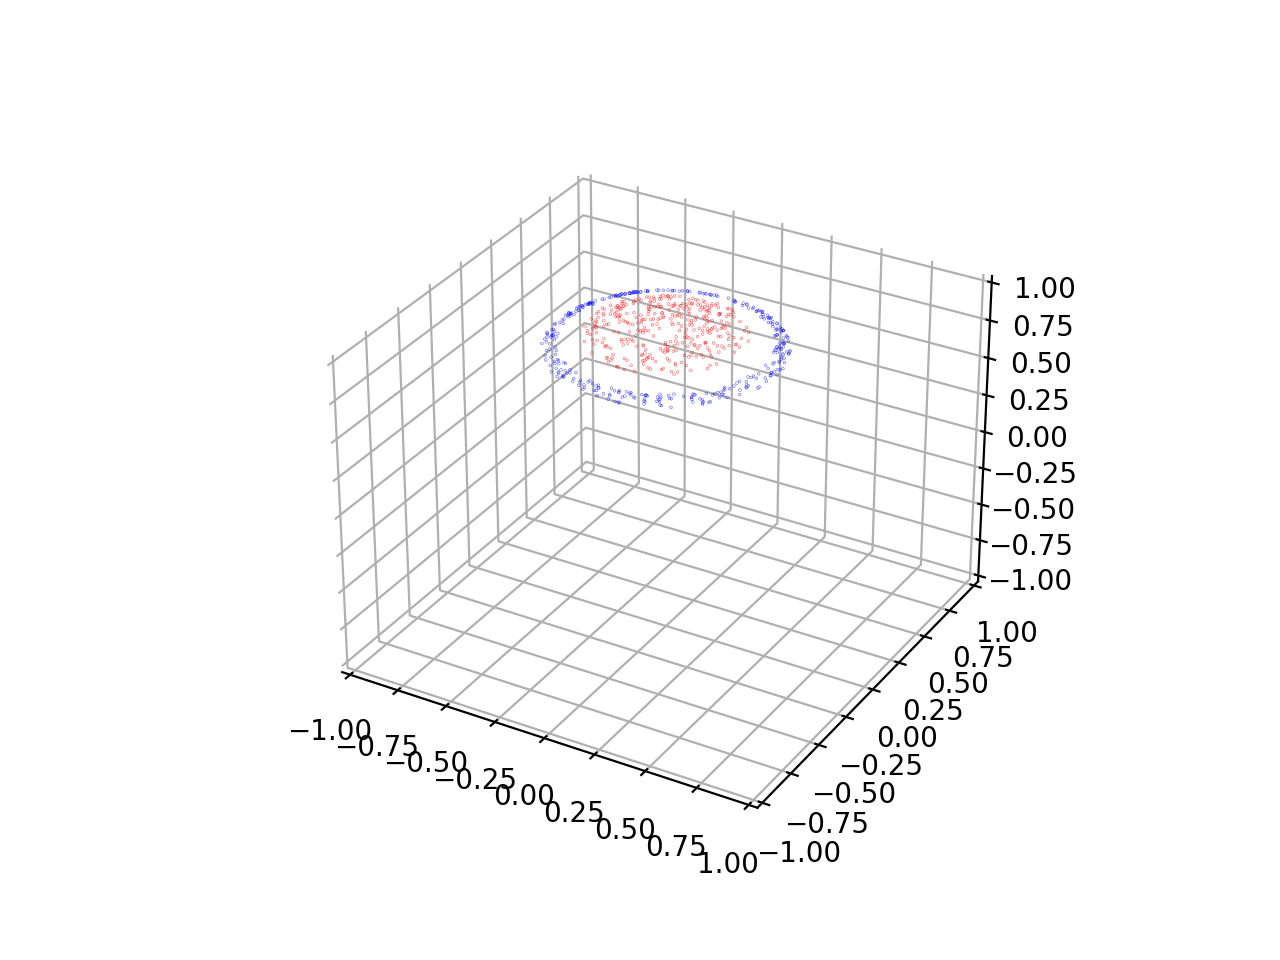

MovieWriter Pillow unavailable; using Pillow instead.


In [44]:
fig = plt.figure(1)    
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((0,0,0))
ax.w_yaxis.set_pane_color((0,0,0))
ax.w_zaxis.set_pane_color((0,0,0))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

from celluloid import Camera
camera = Camera(fig)
for k in np.arange(1,10000,50):
    plot_frame(k)
    plt.pause(0.01)
    camera.snap()

animation = camera.animate()
animation.save('animation.gif', writer='Pillow', fps=8)

In [ ]:
v_Y_prime

In [ ]:
dist_Y_prime[0]

In [ ]:
# coding_Y_prime = [coding(v_Y_prime[i,0], v_Y_prime[i,1], v_Y_prime[i,2]) for i in range(len(v_Y_prime))]
coding_uniform = [coding(v_Y[i,0], v_Y[i,1], v_Y[i,2]) for i in range(len(v_Y_prime))]

plt.hist(coding_uniform, bins = 16, alpha = 0.5)
plt.hist(coding_Y_prime, bins = 16, alpha = 0.5)
plt.title("histogram of gaussian points on sphere (a.k.a uniform)")
plt.xlabel("coding")
plt.ylabel("count")

# Over Orthogonal Group

In [130]:
A = np.diag([4,1/4])
n = len(A)
H = []
for i in range(10000):
    U = ortho_group.rvs(n)
    l , V = np.linalg.eig(U@A)
    max_idx = np.argmax(np.abs(l))
    H.append(V[:,max_idx])


In [131]:
dist_Y_prime = [[np.linalg.norm(A@h),stereo_proj((h[1]/h[0]).real, (h[1]/h[0]).imag)] for h in H]
dist_Y = []
for h in H:
    v = random_S_n(n)
    dist_Y.append([np.linalg.norm(A@v),stereo_proj((v[1]/v[0]).real, (v[1]/v[0]).imag)])

In [132]:
from operator import itemgetter

dist_Y = sorted(dist_Y, key=itemgetter(0))
dist_Y_prime = sorted(dist_Y_prime, key=itemgetter(0))

In [133]:
t1, CDF1 = CDF([Av[0] for Av in dist_Y_prime])
t2, CDF2 = CDF([Av[0] for Av in dist_Y])

plt.plot(t1, CDF1, label = "CDF Y'", color = "red")
plt.plot(t2, CDF2, label = "CDF Y", color = "blue",alpha = 0.6)
plt.legend()
plt.title("CDF to see if 1st Order Dominance")

Text(0.5, 0.92, 'CDF to see if 1st Order Dominance')

In [134]:
plt.plot(t1, rolling_lower_Riemann(lower_Riemann(t1, CDF1)), label = "CDF Y'", color = "red")
plt.plot(t2, rolling_lower_Riemann(lower_Riemann(t2, CDF2)), label = "CDF Y", color = "blue")
plt.legend()
plt.title("Rolling Integral CDF to see if 2nd Order Dominance")

Text(0.5, 0.92, 'Rolling Integral CDF to see if 2nd Order Dominance')

In [135]:
fig = plt.figure(1)    
ax = fig.add_subplot(111, projection='3d')

v_Y_prime = np.array([v[1] for v in dist_Y_prime])
v_Y = np.array([v[1] for v in dist_Y])
ax.scatter3D(v_Y_prime[:,0], v_Y_prime[:,1], v_Y_prime[:,2],
             alpha = 0.55, 
             color = "blue", 
             label = "expanding eigenvector",
             s = 0.03)

ax.scatter3D(v_Y[:,0], v_Y[:,1], v_Y[:,2],
             alpha = 0.55,
             color = "red",
             label = "random vector on $S^2$",
             s = 0.03)
plt.legend()

In [136]:
coding_Y_prime = [coding(v_Y_prime[i,0], v_Y_prime[i,1], v_Y_prime[i,2]) for i in range(len(v_Y_prime))]
coding_uniform = [coding(v_Y[i,0], v_Y[i,1], v_Y[i,2]) for i in range(len(v_Y_prime))]

plt.hist(coding_uniform, bins = 16, alpha = 0.5)
plt.hist(coding_Y_prime, bins = 16, alpha = 0.5)
plt.title("histogram of gaussian points on sphere (a.k.a uniform)")
plt.xlabel("coding")
plt.ylabel("count")

Text(0.5, 0, 'count')

In [137]:
fig = plt.figure(1)    
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((0,0,0))
ax.w_yaxis.set_pane_color((0,0,0))
ax.w_zaxis.set_pane_color((0,0,0))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

def plot_frame(k):
    global dist_Y, dist_Y_prime, fig, ax
    v_Y_prime = np.array([dist_Y_prime[i][1] for i in range(k)])
    v_Y = np.array([dist_Y[i][1] for i in range(k)])

    ax.scatter3D(v_Y_prime[:,0], v_Y_prime[:,1], v_Y_prime[:,2],
                 alpha = 0.85, 
                 color = "blue", 
                 label = "expanding eigenvector",
                 s = 0.05)

    ax.scatter3D(v_Y[:,0], v_Y[:,1], v_Y[:,2],
                 alpha = 0.85,
                 color = "red",
                 label = "random $v \in S^{2}$",
                 s = 0.05)
plot_frame(8901)

In [138]:
k = 8860
v_Y_prime = np.array([dist_Y_prime[i][1] for i in range(k)])
v_Y_prime 

array([[-0.32045696,  0.34461663,  0.88235294],
       [-0.29801656, -0.36419695,  0.88235294],
       [ 0.32283321, -0.3423916 ,  0.88235294],
       ...,
       [-0.35160465,  0.        , -0.93614858],
       [ 0.35137036,  0.        , -0.93623654],
       [-0.35111047,  0.        , -0.93633404]])

<IPython.core.display.Javascript object>


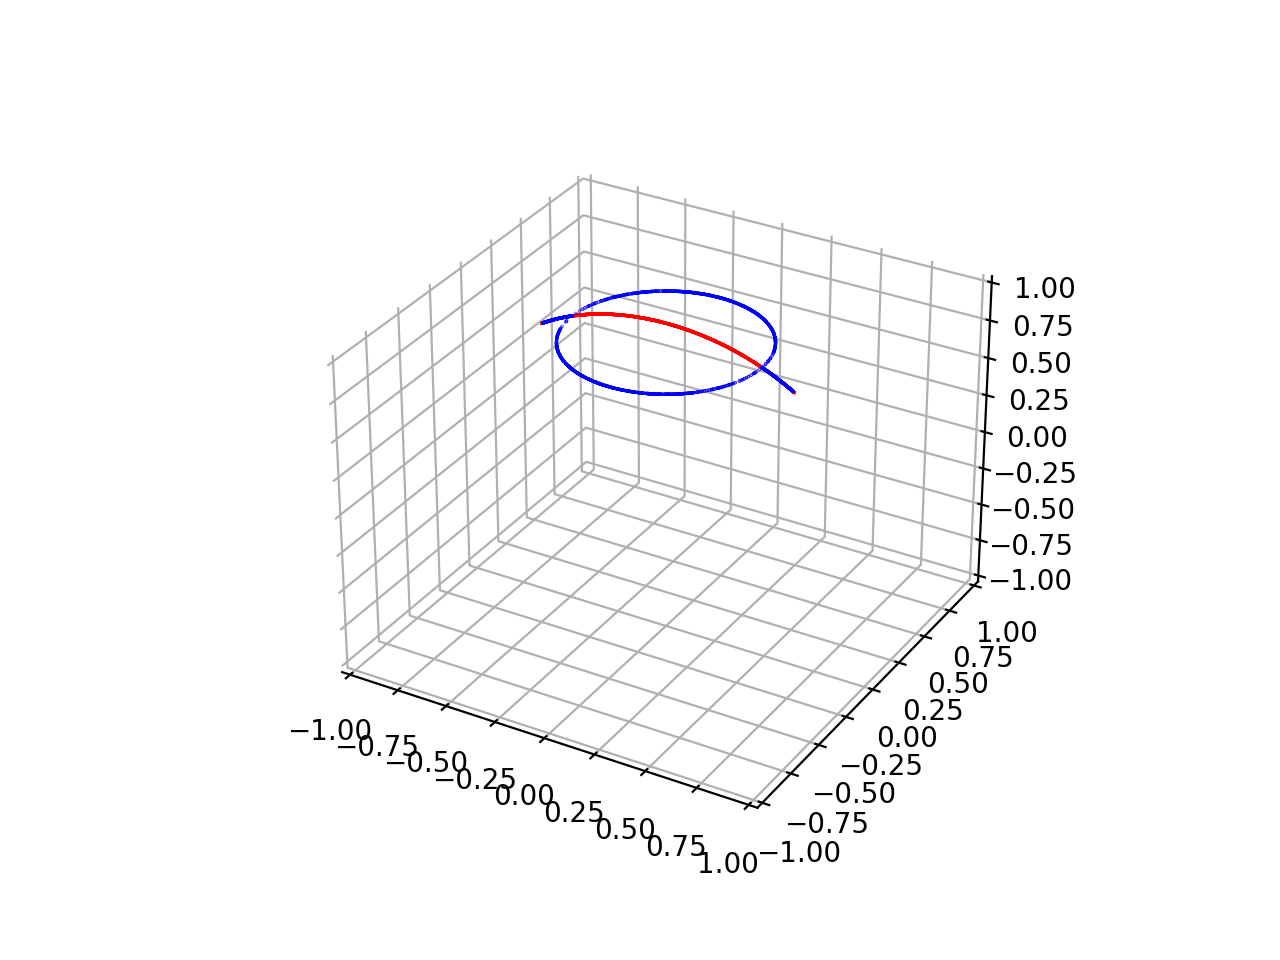

MovieWriter Pillow unavailable; using Pillow instead.


In [139]:
fig = plt.figure(1)    
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((0,0,0))
ax.w_yaxis.set_pane_color((0,0,0))
ax.w_zaxis.set_pane_color((0,0,0))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

from celluloid import Camera
camera = Camera(fig)
for k in np.arange(1,10000,50):
    plot_frame(k)
    plt.pause(0.01)
    camera.snap()

animation = camera.animate()
animation.save('animation.gif', writer='Pillow', fps=10)

In [68]:
dist_Y_prime[0][1]

array([-0.43183449,  0.18700872,  0.88235294])

# SO(2)

In [130]:
A = np.diag([4,2,1/8])
n = len(A)
H = []
for i in range(10000):
    U = special_ortho_group.rvs(n)
    l , V = np.linalg.eig(U@A)
    max_idx = np.argmax(np.abs(l))
    H.append(V[:,max_idx])


In [131]:
dist_Y_prime = [[np.linalg.norm(A@h),stereo_proj((h[1]/h[0]).real, (h[1]/h[0]).imag)] for h in H]
dist_Y = []
for h in H:
    v = random_S_n(n)
    dist_Y.append([np.linalg.norm(A@v),stereo_proj((v[1]/v[0]).real, (v[1]/v[0]).imag)])

In [132]:
from operator import itemgetter

dist_Y = sorted(dist_Y, key=itemgetter(0))
dist_Y_prime = sorted(dist_Y_prime, key=itemgetter(0))

<IPython.core.display.Javascript object>


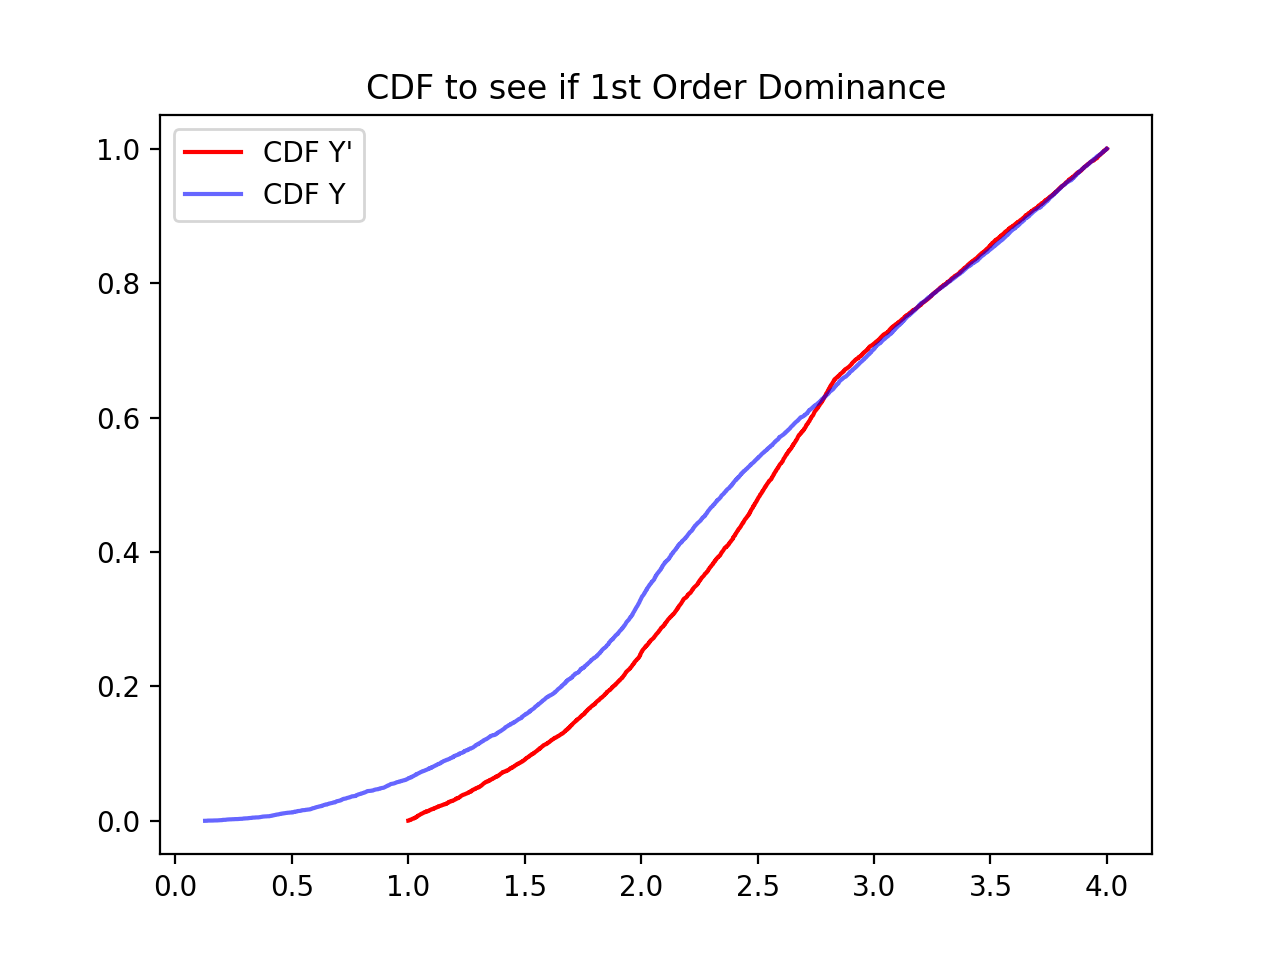

Text(0.5, 1.0, 'CDF to see if 1st Order Dominance')

In [133]:
t1, CDF1 = CDF([Av[0] for Av in dist_Y_prime])
t2, CDF2 = CDF([Av[0] for Av in dist_Y])

plt.plot(t1, CDF1, label = "CDF Y'", color = "red")
plt.plot(t2, CDF2, label = "CDF Y", color = "blue",alpha = 0.6)
plt.legend()
plt.title("CDF to see if 1st Order Dominance")

# No Stochastic Dominance over SO(2)

<IPython.core.display.Javascript object>


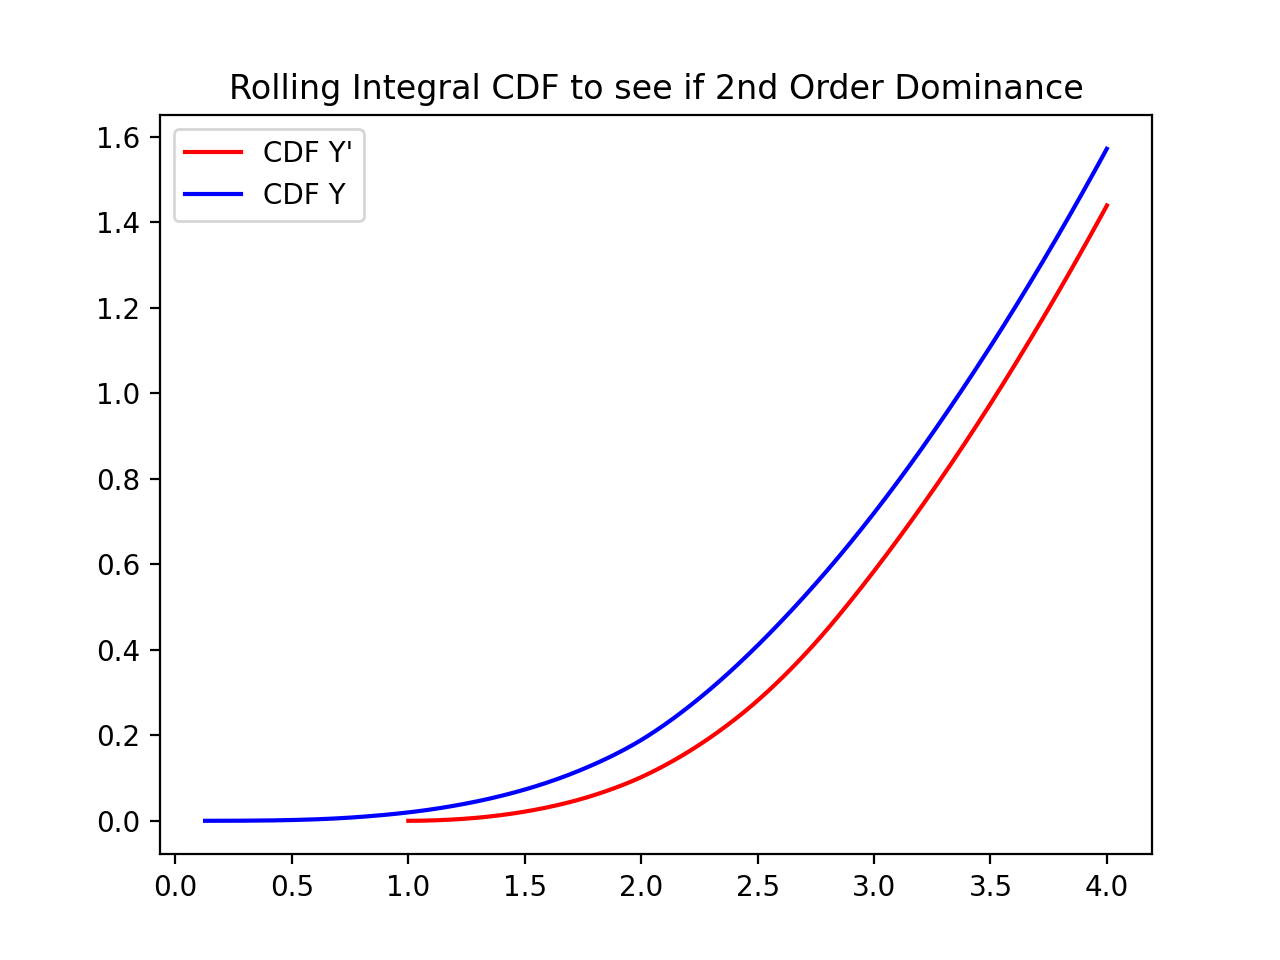

Text(0.5, 1.0, 'Rolling Integral CDF to see if 2nd Order Dominance')

In [134]:
plt.plot(t1, rolling_lower_Riemann(lower_Riemann(t1, CDF1)), label = "CDF Y'", color = "red")
plt.plot(t2, rolling_lower_Riemann(lower_Riemann(t2, CDF2)), label = "CDF Y", color = "blue")
plt.legend()
plt.title("Rolling Integral CDF to see if 2nd Order Dominance")

<IPython.core.display.Javascript object>


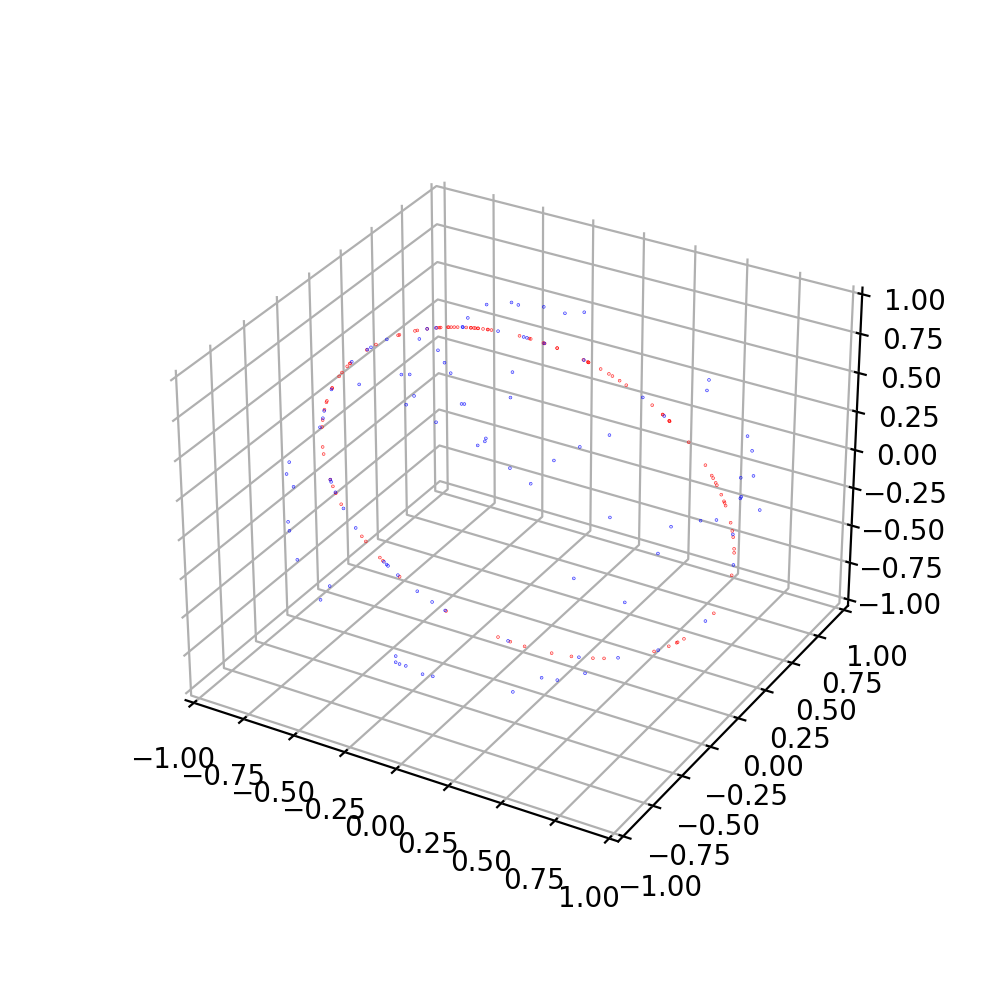

In [173]:
fig = plt.figure(1)    
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((0,0,0))
ax.w_yaxis.set_pane_color((0,0,0))
ax.w_zaxis.set_pane_color((0,0,0))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

def plot_frame(k):
    global dist_Y, dist_Y_prime, fig, ax
    v_Y_prime = np.array([dist_Y_prime[i][1] for i in range(k)])
    v_Y = np.array([dist_Y[i][1] for i in range(k)])

    ax.scatter3D(v_Y_prime[:,0], v_Y_prime[:,1], v_Y_prime[:,2],
                 alpha = 0.85, 
                 color = "blue", 
                 label = "expanding eigenvector",
                 s = 0.05)

    ax.scatter3D(v_Y[:,0], v_Y[:,1], v_Y[:,2],
                 alpha = 0.85,
                 color = "red",
                 label = "random $v \in S^{2}$",
                 s = 0.05)
plot_frame(101)

In [172]:
plot_frame(100)